In [27]:
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import imageio
import pandas as pd
import tensorflow as tf
import os
import cv2
import imghdr
#pip install opencv-python

In [46]:
os.chdir("C:/Users/tomed/OneDrive/Documents/MSc Belfast/DSA8023")

In [51]:
#The data file must be in your cwd
data_dir = 'data'

#Need to check how many files in each class to ensure balanced

In [26]:
#Limits GPU consumption
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [84]:
data = tf.keras.utils.image_dataset_from_directory('data', color_mode="grayscale", seed = 2, 
                                                   class_names = ["grey_partridge", 
                                                                  "stock_dove",
                                                                 "turtle_dove",
                                                                 "yellow_hammer"])

Found 4000 files belonging to 4 classes.


In [71]:
# KWARGS in case we want to change anything
# Consider changing colour mode as thes are black and white 
tf.keras.utils.image_dataset_from_directory

<function keras.utils.image_dataset.image_dataset_from_directory(directory, labels='inferred', label_mode='int', class_names=None, color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=None, validation_split=None, subset=None, interpolation='bilinear', follow_links=False, crop_to_aspect_ratio=False, **kwargs)>

In [85]:
#Make iterator: pulls data batches as we have a lot of data
data_iterator =  data.as_numpy_iterator()

In [86]:
batch = data_iterator.next()

In [87]:
# We've now converted our images to arrays
batch

(array([[[[195.      ],
          [218.73438 ],
          [229.04688 ],
          ...,
          [223.46875 ],
          [227.3125  ],
          [212.      ]],
 
         [[192.25    ],
          [213.4961  ],
          [221.98047 ],
          ...,
          [215.19922 ],
          [217.9414  ],
          [205.5     ]],
 
         [[186.75    ],
          [203.01953 ],
          [207.84766 ],
          ...,
          [198.66016 ],
          [199.19922 ],
          [192.5     ]],
 
         ...,
 
         [[ 93.25    ],
          [123.109375],
          [113.20703 ],
          ...,
          [ 90.55469 ],
          [ 90.77734 ],
          [ 92.5     ]],
 
         [[ 95.75    ],
          [124.078125],
          [114.62109 ],
          ...,
          [100.97656 ],
          [ 93.39453 ],
          [ 95.5     ]],
 
         [[ 97.      ],
          [124.5625  ],
          [115.328125],
          ...,
          [106.1875  ],
          [ 94.703125],
          [ 97.      ]]],
 
 
        [

In [88]:
# Two parts to our arrays [0] = the array and [1] = labels
len(batch)

2

In [89]:
# Examine arrays of pixels
batch[0]

array([[[[195.      ],
         [218.73438 ],
         [229.04688 ],
         ...,
         [223.46875 ],
         [227.3125  ],
         [212.      ]],

        [[192.25    ],
         [213.4961  ],
         [221.98047 ],
         ...,
         [215.19922 ],
         [217.9414  ],
         [205.5     ]],

        [[186.75    ],
         [203.01953 ],
         [207.84766 ],
         ...,
         [198.66016 ],
         [199.19922 ],
         [192.5     ]],

        ...,

        [[ 93.25    ],
         [123.109375],
         [113.20703 ],
         ...,
         [ 90.55469 ],
         [ 90.77734 ],
         [ 92.5     ]],

        [[ 95.75    ],
         [124.078125],
         [114.62109 ],
         ...,
         [100.97656 ],
         [ 93.39453 ],
         [ 95.5     ]],

        [[ 97.      ],
         [124.5625  ],
         [115.328125],
         ...,
         [106.1875  ],
         [ 94.703125],
         [ 97.      ]]],


       [[[150.      ],
         [165.92383 ],
         [181.

In [90]:
# Examine Labels for arrays in batch
# 0 is a label, so it's 0-3 total of four
batch[1]

array([1, 2, 0, 3, 1, 1, 3, 3, 3, 0, 1, 1, 0, 2, 2, 0, 0, 0, 2, 1, 3, 2,
       3, 1, 0, 3, 3, 3, 0, 2, 0, 1])

In [91]:
# images as NParrays
# 32 arrays, size of 256 x 256, 1 channel as greyscale
batch[0].shape

(32, 256, 256, 1)

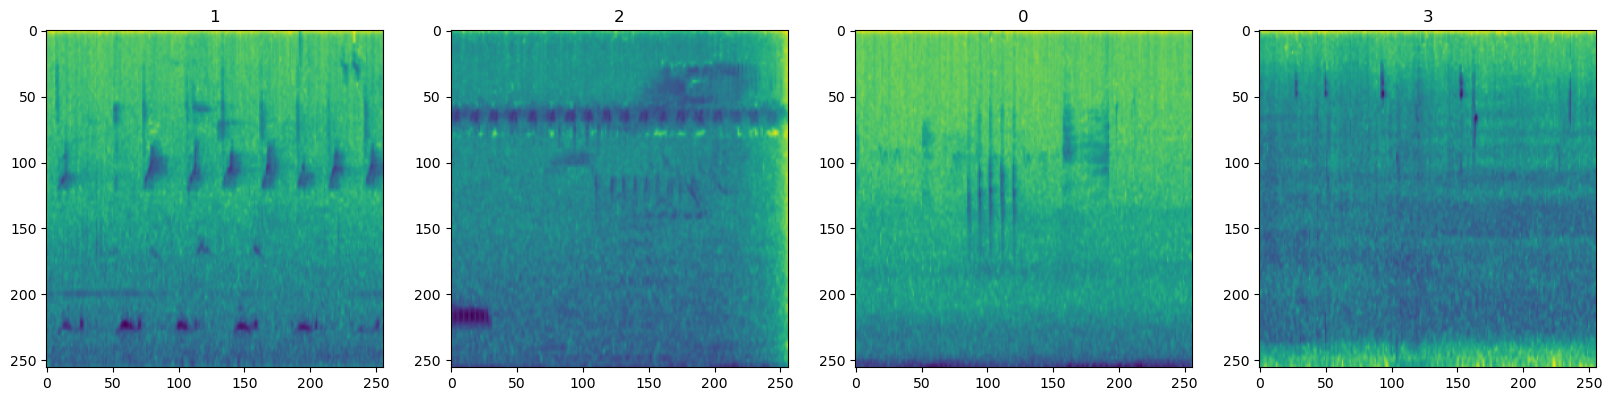